# Capítulo 1: Electrostática y Campos

## Visualizando la Ley de Coulomb
La ecuación clásica es $\vec{E} = k \frac{q}{r^2}\hat{r}$, pero aquí vamos a ver cómo se comportan las líneas de campo realmente.

A continuación, tienes una simulación en vivo. **Prueba cambiar el valor de `q2` a `1.0` para ver la repulsión.**

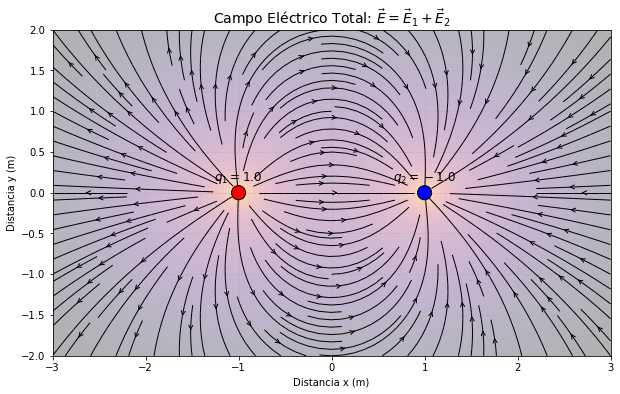

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- PARÁMETROS QUE EL ESTUDIANTE PUEDE MODIFICAR ---
# Carga 1 (en el origen)
q1 = 1.0   # Carga positiva
x1, y1 = -1.0, 0.0

# Carga 2 (puedes cambiarla a positiva para ver repulsión)
q2 = -1.0  # Carga negativa (Dipolo)
x2, y2 = 1.0, 0.0
# ----------------------------------------------------

def campo_electrico(x, y, q, x_c, y_c):
    k = 8.99e9
    # Distancia en componentes
    dx = x - x_c
    dy = y - y_c
    # Distancia al cuadrado y al cubo (para el vector unitario)
    r2 = dx**2 + dy**2
    r3 = r2**(1.5)
    
    # Evitar división por cero (pequeño truco numérico)
    r3[r3 == 0] = 1e-10
    
    # Componentes del campo E = k * q / r^2 * (r_vec / r) = k * q * r_vec / r^3
    Ex = k * q * dx / r3
    Ey = k * q * dy / r3
    return Ex, Ey

# Crear una malla de puntos (el "espacio")
x = np.linspace(-3, 3, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Calcular campo total (Principio de Superposición)
Ex1, Ey1 = campo_electrico(X, Y, q1, x1, y1)
Ex2, Ey2 = campo_electrico(X, Y, q2, x2, y2)

Ex_total = Ex1 + Ex2
Ey_total = Ey1 + Ey2
E_magnitud = np.sqrt(Ex_total**2 + Ey_total**2)

# --- GRAFICAR (La parte visual "Rupturista") ---
plt.figure(figsize=(10, 6))

# Mapa de color logarítmico para la intensidad (para ver el decaimiento)
# Usamos log porque cerca de la carga el campo tiende a infinito
plt.pcolormesh(X, Y, np.log10(E_magnitud), cmap='inferno', shading='auto', alpha=0.3)

# Líneas de campo (Streamplot)
plt.streamplot(X, Y, Ex_total, Ey_total, color='k', linewidth=1, density=1.5, arrowstyle='->')

# Dibujar las cargas
plt.scatter([x1, x2], [y1, y2], c=['red' if q1>0 else 'blue', 'red' if q2>0 else 'blue'], s=200, zorder=10, edgecolors='black')
plt.text(x1, y1+0.15, f"$q_1={q1}$", ha='center', fontsize=12, fontweight='bold')
plt.text(x2, y2+0.15, f"$q_2={q2}$", ha='center', fontsize=12, fontweight='bold')

plt.title(r'Campo Eléctrico Total: $\vec{E} = \vec{E}_1 + \vec{E}_2$', fontsize=14)
plt.xlabel('Distancia x (m)')
plt.ylabel('Distancia y (m)')
plt.xlim(-3, 3)
plt.ylim(-2, 2)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [2]:
import numpy as np
import plotly.graph_objects as go

# --- CONFIGURACIÓN DEL ESPACIO ---
feature_x = np.linspace(-3, 3, 40)
feature_y = np.linspace(-2, 2, 40)
X, Y = np.meshgrid(feature_x, feature_y)

# Carga fija (Centro)
q1 = 1.0
x1, y1 = -1.0, 0.0

# Posición de la carga variable (Derecha)
x2, y2 = 1.0, 0.0

# --- FUNCIÓN CORREGIDA ---
def calcular_campo(q_variable):
    k = 8.99e9
    # Campo 1 (Fijo)
    dx1, dy1 = X - x1, Y - y1
    r1_sq = dx1**2 + dy1**2
    r1_sq[r1_sq == 0] = 1e-10 # Evita división por cero en la posición de la carga
    E1 = k * q1 / r1_sq
    
    # Campo 2 (Variable)
    dx2, dy2 = X - x2, Y - y2
    r2_sq = dx2**2 + dy2**2
    r2_sq[r2_sq == 0] = 1e-10
    E2 = k * q_variable / r2_sq
    
    E_total = E1 + E2
    
    # === AQUÍ ESTÁ LA CORRECCIÓN ===
    # Sumamos + 1e-12 para evitar log(0) si los campos se cancelan
    return np.log10(np.abs(E_total) + 1e-12)

# --- GENERACIÓN DE FRAMES (PRE-CÁLCULO) ---
valores_q2 = np.linspace(-5, 5, 11) 

# Crear la figura base
fig = go.Figure(
    data=[go.Contour(
        z=calcular_campo(valores_q2[0]),
        x=feature_x,
        y=feature_y,
        colorscale='Viridis',
        contours=dict(start=8, end=11, size=0.2, showlines=False),
        line_smoothing=0.85
    )],
    layout=go.Layout(
        title="Interacción de Campos: Varía la carga Q2",
        xaxis=dict(title="Distancia X"),
        yaxis=dict(title="Distancia Y"),
        updatemenus=[dict(type="buttons", buttons=[dict(label="Play", method="animate", args=[None])])]
    )
)

# Crear los cuadros de animación (Frames)
frames = []
for q_val in valores_q2:
    frames.append(go.Frame(
        data=[go.Contour(z=calcular_campo(q_val))], 
        name=f"q={q_val:.1f}" 
    ))

fig.frames = frames

# --- AGREGAR EL DESLIZADOR (SLIDER) ---
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Carga Q2: "},
    pad={"t": 50},
    steps=[dict(
        method='animate',
        args=[[f"q={qv:.1f}"], dict(mode='immediate', frame=dict(duration=0, redraw=True), transition=dict(duration=0))],
        label=f"{qv:.1f} C"
    ) for qv in valores_q2]
)]

fig.update_layout(sliders=sliders, width=700, height=500)

# Añadir marcadores para las cargas
fig.add_trace(go.Scatter(x=[x1], y=[y1], mode='markers+text', marker=dict(size=15, color='red'), name='Q1 (+)', text=['Q1'], textposition='top center'))
fig.add_trace(go.Scatter(x=[x2], y=[y2], mode='markers', marker=dict(size=15, color='orange'), name='Q2 (Variable)'))

# --- REEMPLAZA EL fig.show() POR ESTO ---
from IPython.display import HTML

# Generamos el HTML del gráfico usando la librería de Plotly desde internet (CDN)
# Esto hace que el gráfico funcione en cualquier navegador sin archivos extra.
HTML(fig.to_html(include_plotlyjs='cdn'))